In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Lancement de l'entraînement sur : {device}")

Lancement de l'entraînement sur : cuda


In [4]:



class modele(nn.Module):
    def __init__(self,num_classes):
        super(modele,self).__init__()


        # partie extraction de features ( convolution )

        # conv1 : 

        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        #conv2 :

        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # pooling : 

        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)


        # partie classification 
    
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*16*16,128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,num_classes)

    def forward(self,x):
        # bloc 1 : convolution -> normalisation -> relu -> pool
        x = self.conv1(x)

        x = self.bn1(x)

        x = F.relu(x)

        x = self.pool(x)
        # bloc 2
        x = self.conv2(x)

        x = self.bn2(x)

        x = F.relu(x)

        x = self.pool(x)

        # classification 

        x = self.flatten(x)

        x = self.fc1(x)
        x=F.relu(x)

        x=self.dropout(x)

        x = self.fc2(x)
        x = F.relu(x)

        #x=self.dropout(x)
        
        x=self.fc3(x)
        return x
    





In [ ]:
import pandas as pd
import os
import torch.nn.init as init



model = modele(num_classes=43).to(device)

losses = []
accuracies =[]

class NumericalImageFolder(datasets.ImageFolder):
    def find_classes(self, directory):

        
        folders = [d.name for d in os.scandir(directory) if d.is_dir()]
        
        
        folders.sort(key=lambda x: int(x))
        
       
        class_to_idx = {cls_name: i for i, cls_name in enumerate(folders)}
        
        return folders, class_to_idx

transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

train_data = NumericalImageFolder("archive/Train_Roi",transform=transform)


train_loader = DataLoader(train_data,batch_size=64,shuffle=True)

Erreur = nn.CrossEntropyLoss() # definition de la methode de calcul d'erreur  
optimizer = optim.Adam(model.parameters(),lr=0.0001) # ajustement des poids

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.1, patience=3)


num_epochs = 20

for epoch in range(num_epochs):

    running_loss = 0.0
    correct = 0
    total = 0

    for images,labels in train_loader:
        images,labels = images.to(device) , labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images) ## prediction 
        loss = Erreur(outputs,labels) ## calcul de l'erreur

        loss.backward() # calcul backpropagation
        optimizer.step() # applique backpropagation

        running_loss += loss.item()

        # calcul de la precision
        # predicted = classe predite (qui a la plus haute probabilite)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    avg_loss = running_loss / len(train_loader)

    scheduler.step(avg_loss)
    accuracy = 100 * correct / total
    current_lr = optimizer.param_groups[0]['lr']
    
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Précision: {accuracy:.2f}% - LR: {current_lr}")

    losses.append(avg_loss)
    accuracies.append(accuracy)
    

Epoch 1/20 - Loss: 1.9654 - Précision: 47.71% - LR: 0.0001
Epoch 2/20 - Loss: 0.8111 - Précision: 77.15% - LR: 0.0001
Epoch 3/20 - Loss: 0.5138 - Précision: 85.47% - LR: 0.0001
Epoch 4/20 - Loss: 0.3790 - Précision: 89.46% - LR: 0.0001
Epoch 5/20 - Loss: 0.2992 - Précision: 91.65% - LR: 0.0001
Epoch 6/20 - Loss: 0.2473 - Précision: 93.11% - LR: 0.0001
Epoch 7/20 - Loss: 0.2112 - Précision: 94.09% - LR: 0.0001
Epoch 8/20 - Loss: 0.1910 - Précision: 94.49% - LR: 0.0001
Epoch 9/20 - Loss: 0.1637 - Précision: 95.36% - LR: 0.0001
Epoch 10/20 - Loss: 0.1489 - Précision: 95.77% - LR: 0.0001
Epoch 11/20 - Loss: 0.1341 - Précision: 96.05% - LR: 0.0001
Epoch 12/20 - Loss: 0.1245 - Précision: 96.39% - LR: 0.0001
Epoch 13/20 - Loss: 0.1153 - Précision: 96.62% - LR: 0.0001
Epoch 14/20 - Loss: 0.1066 - Précision: 96.78% - LR: 0.0001
Epoch 15/20 - Loss: 0.0989 - Précision: 97.08% - LR: 0.0001
Epoch 16/20 - Loss: 0.0948 - Précision: 97.15% - LR: 0.0001
Epoch 17/20 - Loss: 0.0852 - Précision: 97.42% - 

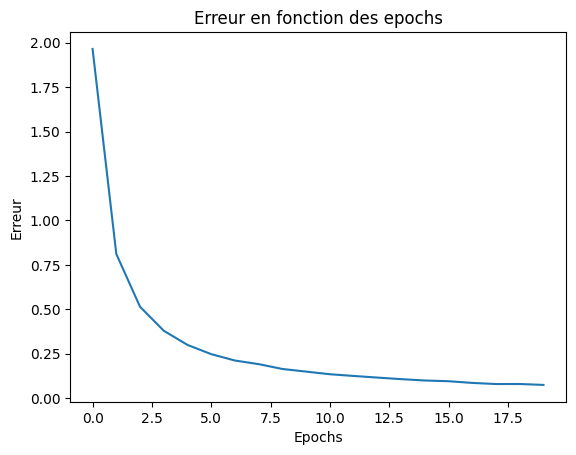

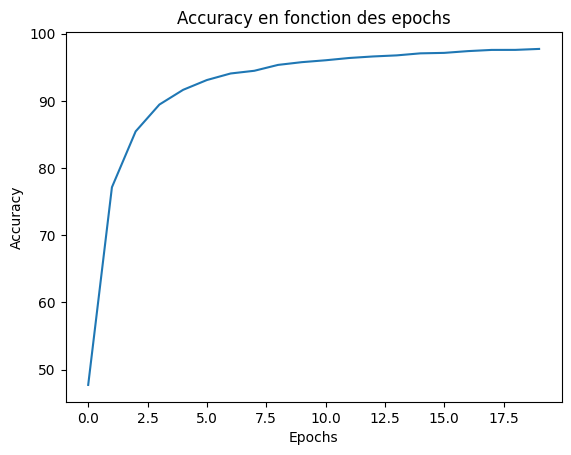

In [99]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Erreur")
plt.title("Erreur en fonction des epochs")

plt.figure(1)
plt.plot(accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction des epochs")
plt.show()

In [ ]:
#torch.save(model.state_dict(),"model.pth")
#print("Modele sauvegarde")

Modele sauvegarde


In [102]:
import pandas as pd
import os
import cv2
from PIL import Image

##model.load_state_dict(torch.load('model_panneaux.pth',map_location=device))
model.eval()

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

df_test = pd.read_csv("archive/Test.csv")
test_dir = "archive/test_Roi"

correct = 0
total = 0

y_true = []
y_pred = []

print("Évaluation en cours...")

with torch.no_grad():
    for index,row in df_test.iterrows():
        #recuperer image et son label
        img_name = row["Path"]
        label_reel = row["ClassId"]

        #charger image
        img_path = os.path.join(test_dir,img_name)
        img = cv2.imread(img_path)
        
        #pretraitement
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tensor = test_transform(img_pil).unsqueeze(0).to(device)


        #prediction 
        outputs = model(img_tensor)
        _,predicted = torch.max(outputs,1)

        y_true.append(label_reel)
        y_pred.append(predicted.item())

        #comparaison avec label
        if predicted.item() == label_reel:
            correct+=1
        total+=1

accuracy = (correct/total) * 100
print("--------------------------")
print(f"Nombre d'images testées : {total}")
print(f"Nombre de succès : {correct}")
print(f"PRÉCISION FINALE : {accuracy:.2f}%")





Évaluation en cours...
--------------------------
Nombre d'images testées : 12630
Nombre de succès : 11885
PRÉCISION FINALE : 94.10%


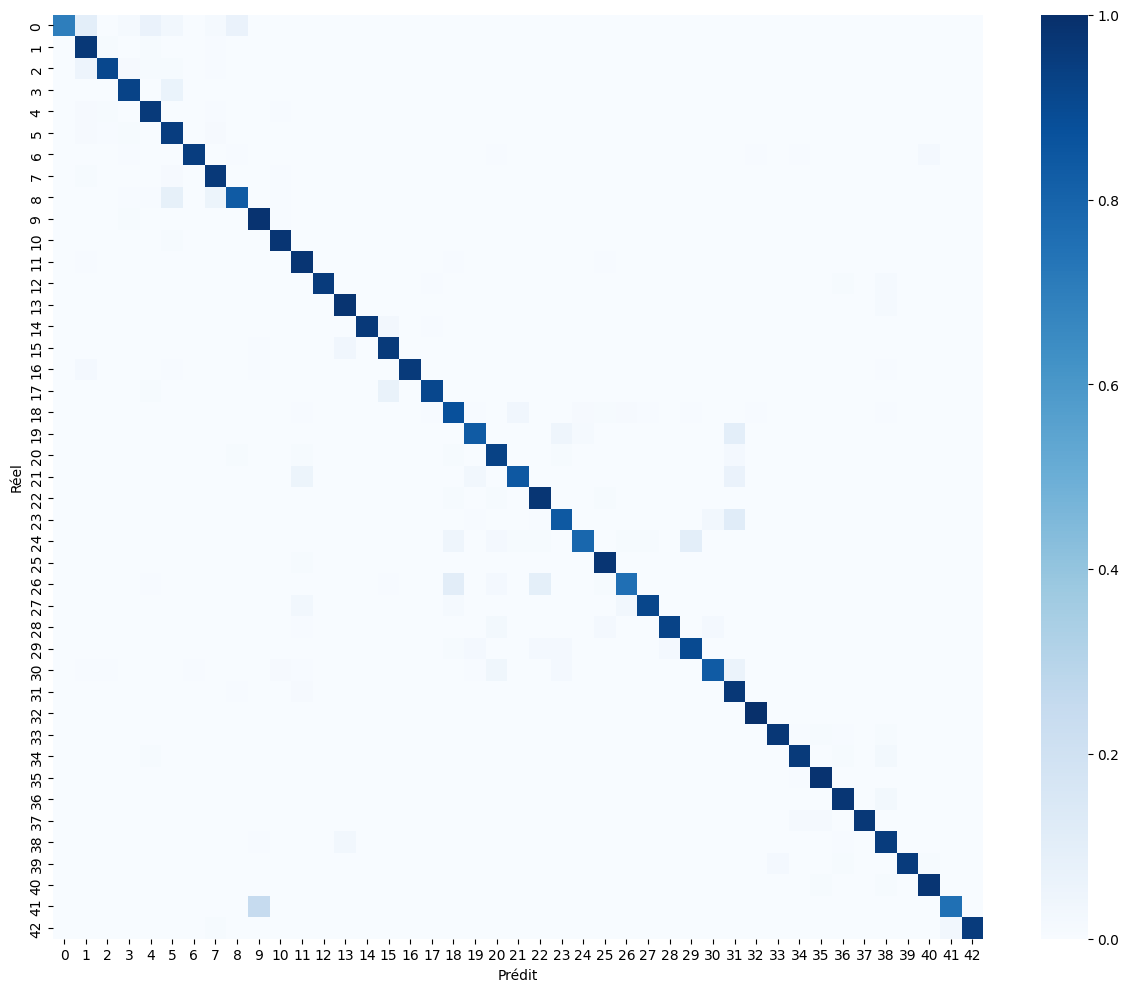

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred,normalize='true')

plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [106]:

# Test des panneaux 20 et 30

import pandas as pd
import os
import cv2
from PIL import Image

##model.load_state_dict(torch.load('model_panneaux.pth',map_location=device))
model.eval()

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

df_test = pd.read_csv("archive/Test.csv")
test_dir = "archive/test_Roi"

correct = 0
total = 0

y_true = []
y_pred = []

print("Évaluation en cours...")

with torch.no_grad():
    for index,row in df_test.iterrows():
        if row["ClassId"]==0 or row["ClassId"]==1:
            #recuperer image et son label
            img_name = row["Path"]
            label_reel = row["ClassId"]

            #charger image
            img_path = os.path.join(test_dir,img_name)
            img = cv2.imread(img_path)
            
            #pretraitement
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)
            img_tensor = test_transform(img_pil).unsqueeze(0).to(device)



            #prediction 
            outputs = model(img_tensor)
            _,predicted = torch.max(outputs,1)

            #comparaison avec label
            if predicted.item() == label_reel:
                correct+=1
            total+=1

            y_true.append(label_reel)
            y_pred.append(predicted.item())

accuracy = (correct/total) * 100
print("--------------------------")
print(f"Nombre d'images testées : {total}")
print(f"Nombre de succès : {correct}")
print(f"PRÉCISION FINALE : {accuracy:.2f}%")





Évaluation en cours...
--------------------------
Nombre d'images testées : 780
Nombre de succès : 739
PRÉCISION FINALE : 94.74%


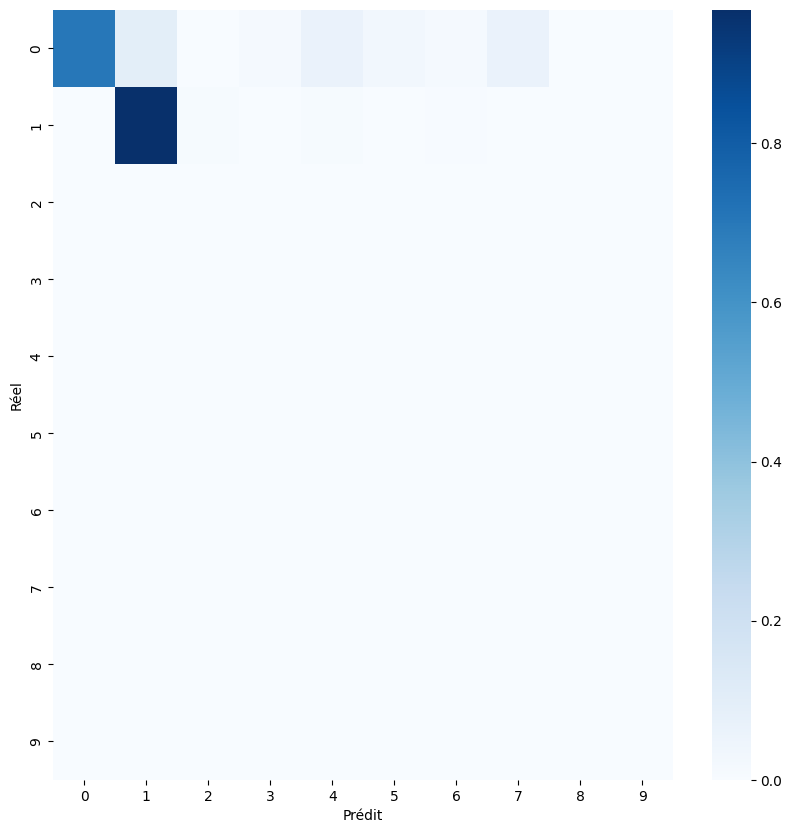

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred,normalize='true')

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [9]:


# Test des panneaux 20 et 30
import pandas as pd
import os
import torch.nn.init as init
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import pandas as pd
import os
import cv2
from PIL import Image

model = modele(num_classes=43).to(device)

model.load_state_dict(torch.load('model.pth',map_location=device))
model.eval()

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

df_test = pd.read_csv("archive/Test.csv")
test_dir = "archive/test_Roi"

correct = 0
total = 0

y_true = []
y_pred = []

print("Évaluation en cours...")

with torch.no_grad():
    for index,row in df_test.iterrows():
        #recuperer image et son label
        img_name = row["Path"]
        label_reel = row["ClassId"]

        #charger image
        img_path = os.path.join(test_dir,img_name)
        img = cv2.imread(img_path)
        
        #pretraitement
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tensor = test_transform(img_pil).unsqueeze(0).to(device)


        #prediction 
        outputs = model(img_tensor)
        _,predicted = torch.max(outputs,1)

        y_true.append(label_reel)
        y_pred.append(predicted.item())

        #comparaison avec label
        if predicted.item() == label_reel:
            correct+=1
        total+=1

accuracy = (correct/total) * 100
print("--------------------------")
print(f"Nombre d'images testées : {total}")
print(f"Nombre de succès : {correct}")
print(f"PRÉCISION FINALE : {accuracy:.2f}%")






Évaluation en cours...
--------------------------
Nombre d'images testées : 12630
Nombre de succès : 11885
PRÉCISION FINALE : 94.10%
